# Chronos Time Series Prediction Playbook

[Huggingface](https://huggingface.co/amazon/chronos-bolt-tiny)

In [1]:
def extend_path():
    """Extend notebooks system path config to import relative packages."""
    import sys
    from pathlib import Path

    parent_folder = str(Path.cwd().parent)
    print(f"Adding {parent_folder} to sys.path")
    if parent_folder not in sys.path:
        sys.path.insert(0, parent_folder)


extend_path()

Adding /Users/lukaskurz/University/fusiontimeseries to sys.path


In [2]:
import torch
from chronos import BaseChronosPipeline
from playground.utils import plot_forecast

In [8]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {DEVICE}")

MODEL_PATH = "amazon/chronos-bolt-tiny"
N_TIMESERIES = 1

Using device: mps


In [9]:
pipeline: BaseChronosPipeline = BaseChronosPipeline.from_pretrained(
    pretrained_model_name_or_path=MODEL_PATH,
    device_map=DEVICE,  # use "cpu" for CPU inference and "mps" for Apple Silicon
    dtype=torch.bfloat16,
)

In [10]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# Chronos-Bolt models generate quantile forecasts, so forecast has shape
# [num_series, num_quantiles, prediction_length].
torch.manual_seed(42)
context = torch.rand((N_TIMESERIES, 128), device=DEVICE)
context.shape

torch.Size([1, 128])

In [11]:
forecast: torch.Tensor = pipeline.predict(inputs=context, prediction_length=64)
forecast = forecast.permute(0, 2, 1)

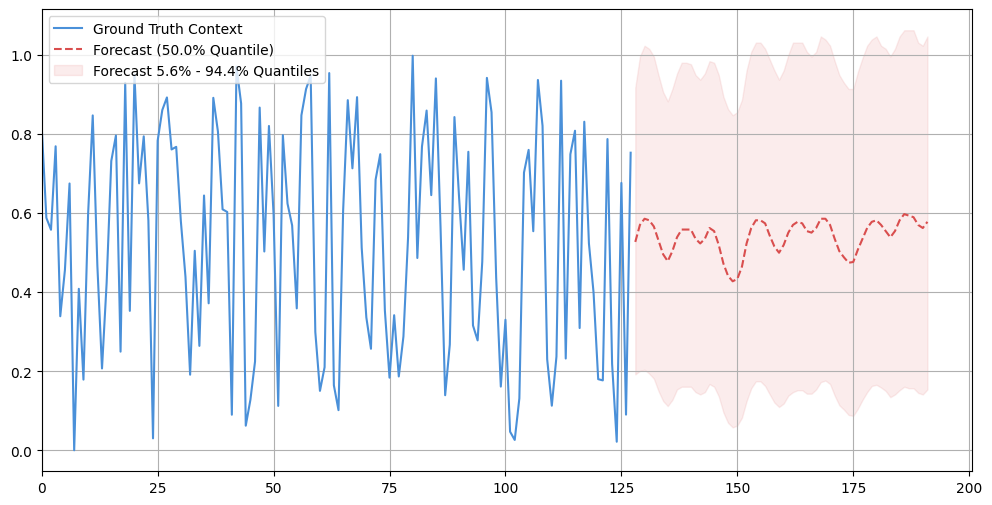

In [12]:
plot_forecast(ctx=context, quantile_fc=forecast, real_future_values=None, batch_idx=0)